# 参考件数博客
- 地址：https://www.jianshu.com/p/e79a8c41cb1a

In [92]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv("./data.csv")
test = pd.read_csv("./test.csv")
PassengerId=test['PassengerId']
all_data = pd.concat([train, test], ignore_index = True)

In [93]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 特征含义
- PassengerID（ID）
- Survived(存活与否)
- Pclass（客舱等级，较为重要）
- Name（姓名，可提取出更多信息）
- Sex（性别，较为重要）
- Age（年龄，较为重要）
- Parch（直系亲友）
- SibSp（旁系）
- Ticket（票编号）
- Fare（票价）
- Cabin（客舱编号）
- Embarked（上船的港口编号）

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 观察数据

In [95]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

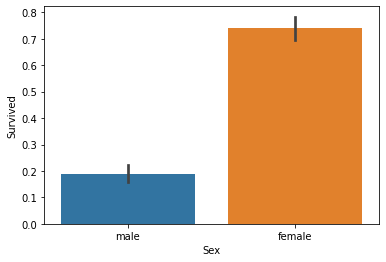

In [96]:
sns.barplot(x="Sex", y="Survived", data=train)
# 女性幸存率远远高于男性

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

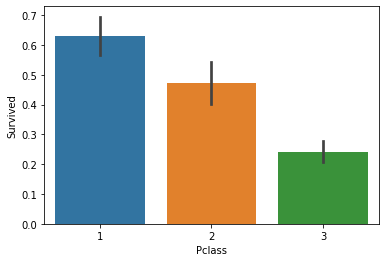

In [97]:
sns.barplot(x="Pclass", y="Survived", data=train)
# 乘客的社会等级越高，幸存率越高

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

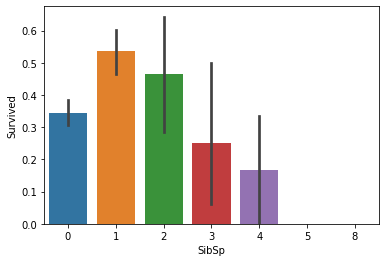

In [98]:
sns.barplot(x="SibSp", y="Survived", data=train)
# 配偶及兄弟姐妹数适中的乘客幸存率更高

Text(12.359751157407416, 0.5, 'density')

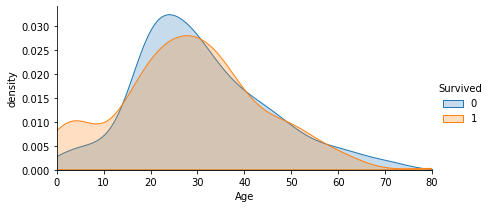

In [99]:
facet = sns.FacetGrid(train, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlabel('Age') 
plt.ylabel('density') 

#从不同生还情况的密度图可以看出，在年龄15岁的左侧，生还率有明显差别，密度图非交叉区域面积非常大，但在其他年龄段，则差别不是很明显，认为是随机所致，因此可以考虑将此年龄偏小的区域分离出来。

<AxesSubplot:xlabel='Embarked', ylabel='count'>

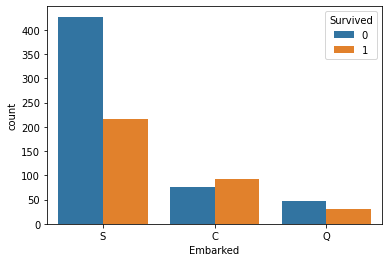

In [100]:
# C地的生存率更高,这个也应该保留为模型特征.
sns.countplot('Embarked',hue='Survived',data=train)

<AxesSubplot:xlabel='Title', ylabel='Survived'>

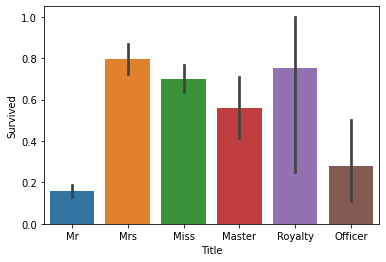

In [101]:
# 新增Title特征，从姓名中提取乘客的称呼，归纳为六类
all_data['Title'] = all_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))

all_data['Title'] = all_data['Title'].map(Title_Dict)
sns.barplot(x="Title", y="Survived", data=all_data)

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

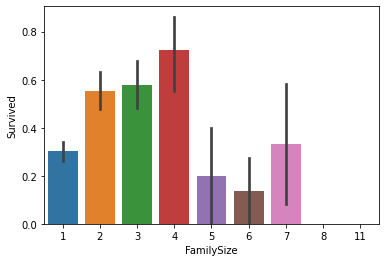

In [102]:
# 家庭人数为2到4的乘客幸存率较高
# 新增FamilyLabel特征
all_data['FamilySize']=all_data['SibSp']+all_data['Parch']+1
sns.barplot(x="FamilySize", y="Survived", data=all_data)

<AxesSubplot:xlabel='FamilyLabel', ylabel='Survived'>

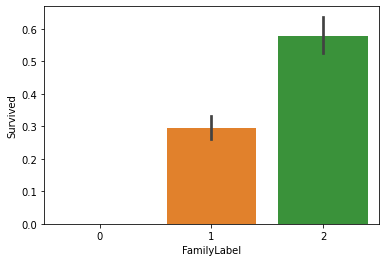

In [103]:
# 按生存率把FamilySize分为三类，构成FamilyLabel特征。
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0
all_data['FamilyLabel']=all_data['FamilySize'].apply(Fam_label)
sns.barplot(x="FamilyLabel", y="Survived", data=all_data)

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

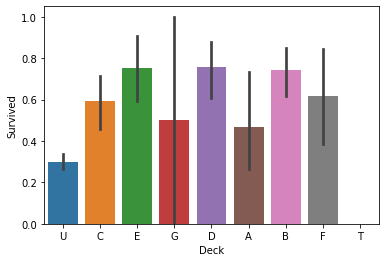

In [104]:
# 不同甲板的乘客幸存率不同
# 新增Deck特征
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Deck']=all_data['Cabin'].str.get(0)
sns.barplot(x="Deck", y="Survived", data=all_data)

<AxesSubplot:xlabel='TicketGroup', ylabel='Survived'>

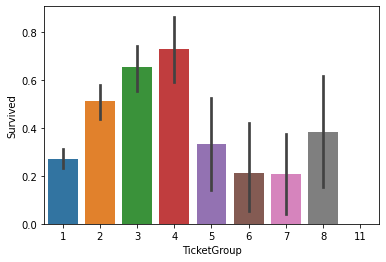

In [105]:
# 与2至4人共票号的乘客幸存率较高
# 新增TicketGroup特征，统计每个乘客的共票号数
Ticket_Count = dict(all_data['Ticket'].value_counts())
all_data['TicketGroup'] = all_data['Ticket'].apply(lambda x:Ticket_Count[x])
sns.barplot(x='TicketGroup', y='Survived', data=all_data)

<AxesSubplot:xlabel='TicketGroup', ylabel='Survived'>

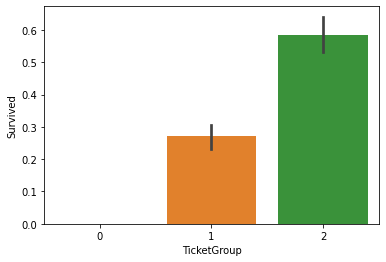

In [106]:
# 按生存率把TicketGroup分为三类
def Ticket_Label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) | (s == 1):
        return 1
    elif (s > 8):
        return 0

all_data['TicketGroup'] = all_data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x='TicketGroup', y='Survived', data=all_data)

# 数据清洗

In [107]:
# 缺失值填充
# Age Feature：Age缺失量为263，缺失量较大，用Sex, Title, Pclass三个特征构建随机森林模型，填充年龄缺失值。
# 估计自己之前做的这里出了问题
from sklearn.ensemble import RandomForestRegressor
age_df = all_data[['Age', 'Pclass','Sex','Title']]
age_df=pd.get_dummies(age_df)
known_age = age_df[age_df.Age.notnull()].values
unknown_age = age_df[age_df.Age.isnull()].values
y = known_age[:, 0]
X = known_age[:, 1:]
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
all_data.loc[ (all_data.Age.isnull()), 'Age' ] = predictedAges 

In [108]:
# Embarked缺失量为2，
all_data[all_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyLabel,Deck,TicketGroup
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,1,1,B,2
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,1,1,B,2


In [109]:
all_data.groupby(by=["Pclass","Embarked"]).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [110]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

In [111]:
# Fare缺失量为1，缺失Fare信息的乘客的Embarked为S，Pclass为3，所以用Embarked为S，Pclass为3的乘客的Fare中位数填充
all_data[all_data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyLabel,Deck,TicketGroup
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Unknown,S,Mr,1,1,U,1


In [112]:
fare=all_data[(all_data['Embarked'] == "S") & (all_data['Pclass'] == 3)].Fare.median()
all_data['Fare']=all_data['Fare'].fillna(fare)

In [113]:
# 把姓氏相同的乘客划分为同一组，从人数大于一的组中分别提取出每组的妇女儿童和成年男性。
all_data['Surname']=all_data['Name'].apply(lambda x:x.split(',')[0].strip())
Surname_Count = dict(all_data['Surname'].value_counts())
all_data['FamilyGroup'] = all_data['Surname'].apply(lambda x:Surname_Count[x])
Female_Child_Group=all_data.loc[(all_data['FamilyGroup']>=2) & ((all_data['Age']<=12) | (all_data['Sex']=='female'))]
Male_Adult_Group=all_data.loc[(all_data['FamilyGroup']>=2) & (all_data['Age']>12) & (all_data['Sex']=='male')]

In [114]:
# 发现绝大部分女性和儿童组的平均存活率都为1或0，即同组的女性和儿童要么全部幸存，要么全部遇难。
Female_Child=pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns=['GroupCount']
Female_Child

,GroupCount
1.000000,115
0.000000,31
0.750000,2
0.333333,1
0.142857,1


Text(0.5, 0, 'AverageSurvived')

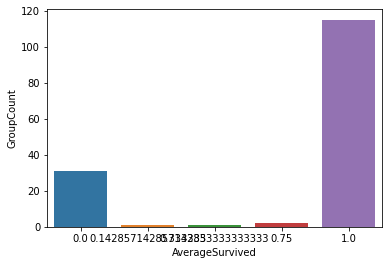

In [115]:
sns.barplot(x=Female_Child.index, y=Female_Child["GroupCount"]).set_xlabel('AverageSurvived')

In [116]:
# 绝大部分成年男性组的平均存活率也为1或0。
Male_Adult=pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns=['GroupCount']
Male_Adult

,GroupCount
0.000000,122
1.000000,20
0.500000,6
0.333333,2
0.250000,1


- 因为普遍规律是女性和儿童幸存率高，成年男性幸存较低，所以我们把不符合普遍规律的反常组选出来单独处理。把女性和儿童组中幸存率为0的组设置为遇难组，把成年男性组中存活率为1的设置为幸存组，推测处于遇难组的女性和儿童幸存的可能性较低，处于幸存组的成年男性幸存的可能性较高

In [117]:
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_List)
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
print(Survived_List)

{'Rice', 'Arnold-Franchi', 'Zabour', 'Danbom', 'Lahtinen', 'Robins', 'Turpin', 'Panula', 'Skoog', 'Olsson', 'Goodwin', 'Oreskovic', 'Vander Planke', 'Ford', 'Barbara', 'Lefebre', 'Bourke', 'Van Impe', 'Canavan', 'Rosblom', 'Cacic', 'Attalah', 'Ilmakangas', 'Lobb', 'Strom', 'Palsson', 'Jussila', 'Sage', 'Johnston', 'Boulos', 'Caram'}
{'Harder', 'Greenfield', 'Goldenberg', 'Jonsson', 'Bishop', 'Dick', 'Chambers', 'Daly', 'Frauenthal', 'Taylor', 'Beane', 'Cardeza', 'Bradley', 'Duff Gordon', 'McCoy', 'Nakid', 'Frolicher-Stehli', 'Jussila', 'Beckwith', 'Kimball'}


In [118]:
train=all_data.loc[all_data['Survived'].notnull()]
test=all_data.loc[all_data['Survived'].isnull()]
test.loc[(test['Name'].apply(lambda x:x in Dead_List)),'Sex'] = 'male'
test.loc[(test['Name'].apply(lambda x:x in Dead_List)),'Age'] = 60
test.loc[(test['Name'].apply(lambda x:x in Dead_List)),'Title'] = 'Mr'
test.loc[(test['Name'].apply(lambda x:x in Survived_List)),'Sex'] = 'female'
test.loc[(test['Name'].apply(lambda x:x in Survived_List)),'Age'] = 5
test.loc[(test['Name'].apply(lambda x:x in Survived_List)),'Title'] = 'Miss'

- 为了使处于这两种反常组中的样本能够被正确分类，对测试集中处于反常组中的样本的Age，Title，Sex进行惩罚修改。

In [119]:
# 选取特征，转换为数值变量，划分训练集和测试集。
all_data=pd.concat([train, test])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  FamilySize   1309 non-null   int64  
 14  FamilyLabel  1309 non-null   int64  
 15  Deck         1309 non-null   object 
 16  TicketGroup  1309 non-null   int64  
 17  Surname      1309 non-null   object 
 18  FamilyGroup  1309 non-null   int64  
dtypes: flo

In [120]:
all_data=all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','FamilyLabel','Deck','TicketGroup']]
all_data=pd.get_dummies(all_data)
train=all_data[all_data['Survived'].notnull()]
test=all_data[all_data['Survived'].isnull()].drop('Survived',axis=1)
X = train.values[:,1:]
y = train.values[:,0]

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

pipe=Pipeline([('select',SelectKBest(k=20)), 
               ('classify', RandomForestClassifier(random_state = 10, max_features = 'sqrt'))])

param_test = {'classify__n_estimators':list(range(20,50,2)), 
              'classify__max_depth':list(range(3,60,3))}
gsearch = GridSearchCV(estimator = pipe, param_grid = param_test, scoring='roc_auc', cv=10)
gsearch.fit(X,y)
print(gsearch.best_params_, gsearch.best_score_)

{'classify__max_depth': 6, 'classify__n_estimators': 48} 0.8793119995472937


In [141]:
from sklearn.pipeline import make_pipeline
select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 48,
                                  max_depth = 6, 
                                  max_features = 'sqrt')
pipeline = make_pipeline(select, clf)
pipeline.fit(X, y)

Pipeline(steps=[('selectkbest', SelectKBest(k=20)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=6, max_features='sqrt',
                                        n_estimators=48, random_state=10,
                                        warm_start=True))])

In [142]:
from sklearn import  metrics
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(pipeline, X, y, cv= 10)
print("CV Score : Mean - %.7g | Std - %.7g " % (np.mean(cv_score), np.std(cv_score)))

CV Score : Mean - 0.8395131 | Std - 0.04111372 


In [143]:
result = pipeline.predict(test)
result = result.astype(np.int32)

In [144]:
submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = PassengerId
submission_df['Survived'] = result
submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


# 结果
- 0.77751
- 感觉数据分析的挺正确的，还以为能够到0.8以上呢。后面还是好好学学分析数据的思维
- 或者换一种模型来试试